In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

df = pd.read_parquet('../data/rucphen_precipitation.parquet')

In [34]:
def create_plot(df, x,xlabel, y, ylabel, title):
    # Create a line plot using seaborn
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=df, x = x, y = y)

    # Set labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Display the plot
    plt.show()
def show_df(df, start = pd.to_datetime('2020-02-01 08:00:00'), end = pd.to_datetime('2023-11-01 08:00:00')):
    # Define the start and end timestamps
    start_timestamp = start
    end_timestamp = end

    # Create a boolean mask for the specified time range
    mask = (df['timestamp'] >= start_timestamp) & (df['timestamp'] < end_timestamp)

    # Apply the mask to get the desired slice of the DataFrame
    result_df = df[mask]

    create_plot(result_df, 'timestamp','Timestamp', 'precipitation','mm', 'Line Plot: Rainfall over time')
    create_plot(result_df, 'timestamp','Timestamp', 'percentage','%', 'Line Plot: Percentage full over time')


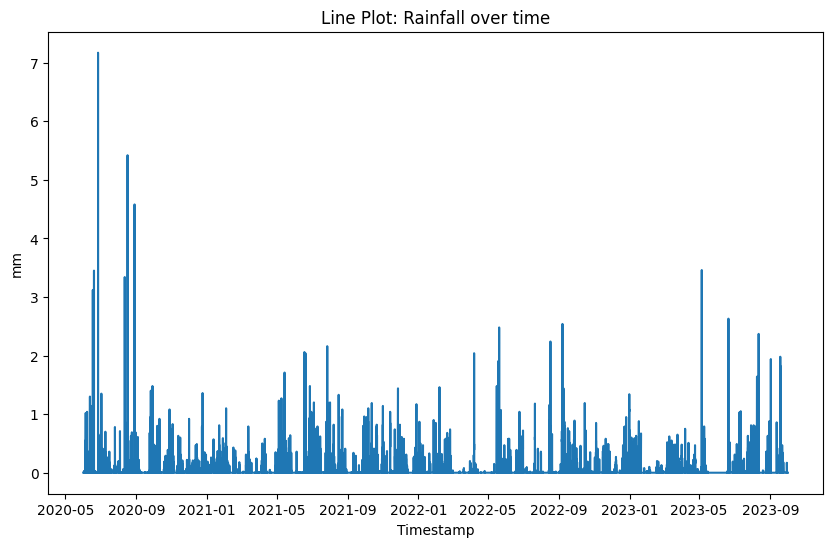

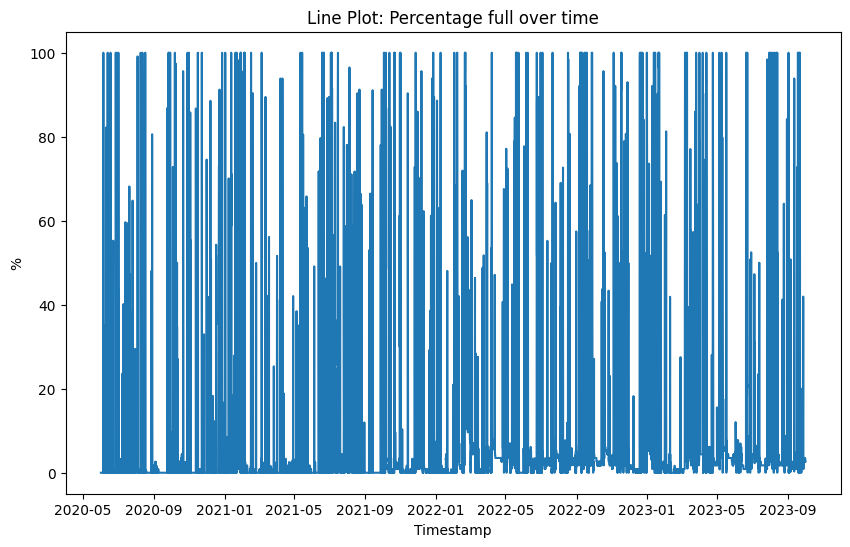

In [35]:
show_df(df, pd.to_datetime('2020-06-01 08:00:00'), pd.to_datetime('2023-10-01 08:00:00'))

/tmp/ipykernel_5608/1151599856.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reduced.fillna(0, inplace=True)


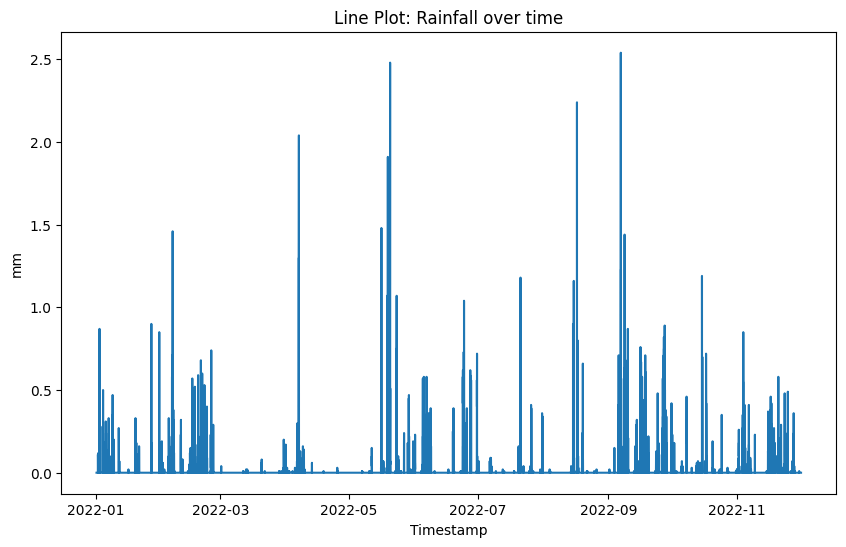

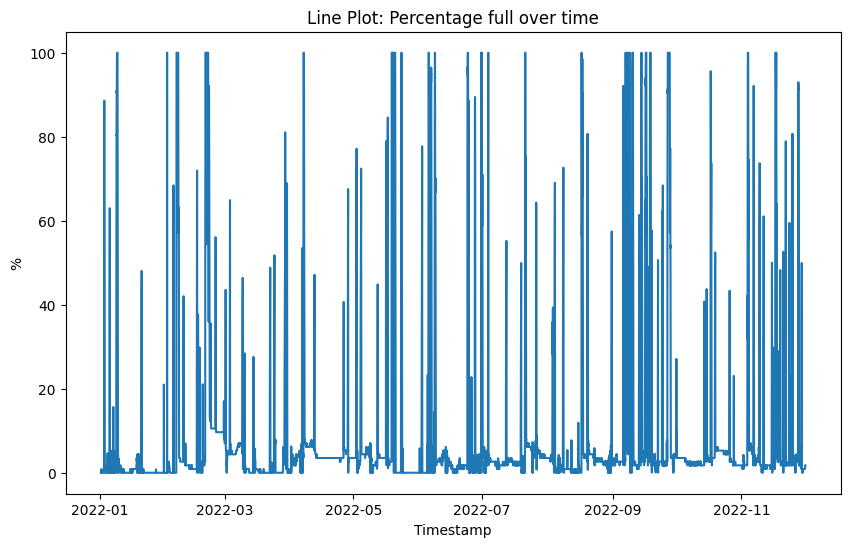

In [36]:
start_timestamp = pd.to_datetime('2022-01-01 08:00:00')
end_timestamp = pd.to_datetime('2022-12-01 08:00:00')

# Create a boolean mask for the specified time range
mask = (df['timestamp'] >= start_timestamp) & (df['timestamp'] < end_timestamp)

# Apply the mask to get the desired slice of the DataFrame
df_reduced = df[mask]
df_reduced.fillna(0, inplace=True)
show_df(df_reduced)

In [37]:
def df_features_of_df(df: pd.DataFrame):
    # Datetime features
    # Extracting features
    df_features = df.copy()
    df_features['percentage_delta'] = df_features['percentage'].diff()
    df_features['percentage_delta'].fillna(0, inplace=True)
    print(df_features)

    df_features['hour'] = df_features['timestamp'].dt.hour
    df_features['dayofweek'] = df_features['timestamp'].dt.hour
    df_features['month'] = df_features['timestamp'].dt.hour

    # Define the lags you want
    # precipitation_lags = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    # percentage_delta_lags = [1, 2, 3, 4]

    df_features['precipitation_0-30'] = df_features['precipitation'].rolling(6, min_periods=1).sum()
    df_features['precipitation_0-60'] = df_features['precipitation'].rolling(12, min_periods=1).sum()
    df_features['precipitation_0-90'] = df_features['precipitation'].rolling(18, min_periods=1).sum()
    df_features['precipitation_0-120'] = df_features['precipitation'].rolling(24, min_periods=1).sum()
    df_features['precipitation_0-180'] = df_features['precipitation'].rolling(30, min_periods=1).sum()
    df_features['precipitation_0-240'] = df_features['precipitation'].rolling(36, min_periods=1).sum()
    # df_features['percentage_0-30'] = df_features['percentage'].rolling(6, min_periods=1).sum()
    # df_features['percentage_delta_30-60'] = df_features['percentage_delta'].shift(5).rolling(8, min_periods=1).sum()
    # df_features['percentage_delta_60-90'] = df_features['percentage_delta'].shift(13).rolling(6, min_periods=1).sum()
    # df_features['percentage_delta_90-120'] = df_features['percentage_delta'].shift(19).rolling(6, min_periods=1).sum()

    # Add lag features for 'precipitation'
    # for lag in precipitation_lags:
    #     df_features[f'precipitation_lag_{lag}'] = df_features['precipitation'].shift(lag)

    # Add lag features for 'percentage_delta'
    # for lag in percentage_delta_lags:
    #     df_features[f'percentage_delta_lag_{lag}'] = df_features['percentage_delta'].shift(lag)

    return df_features

In [38]:
df_features = df_features_of_df(df_reduced)
# Drop rows with NaN values introduced by the lag operation
df_features.dropna(inplace=True)

# Reset index to integers
df_features = df_features.reset_index(drop=True)
df_features.head()

                 timestamp  precipitation  percentage  percentage_delta
313409 2022-01-01 08:00:00            0.0       0.000               0.0
313410 2022-01-01 08:05:00            0.0       0.000               0.0
313411 2022-01-01 08:10:00            0.0       0.000               0.0
313412 2022-01-01 08:15:00            0.0       0.000               0.0
313413 2022-01-01 08:20:00            0.0       0.000               0.0
...                    ...            ...         ...               ...
409004 2022-12-01 07:35:00            0.0       1.754               0.0
409005 2022-12-01 07:40:00            0.0       1.754               0.0
409006 2022-12-01 07:45:00            0.0       1.754               0.0
409007 2022-12-01 07:50:00            0.0       1.754               0.0
409008 2022-12-01 07:55:00            0.0       1.754               0.0

[95600 rows x 4 columns]


,timestamp,precipitation,percentage,percentage_delta,hour,dayofweek,month,precipitation_0-30,precipitation_0-60,precipitation_0-90,precipitation_0-120,precipitation_0-180,precipitation_0-240
0,2022-01-01 08:00:00,0.0,0.0,0.0,8,8,8,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-01 08:05:00,0.0,0.0,0.0,8,8,8,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-01-01 08:10:00,0.0,0.0,0.0,8,8,8,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-01 08:15:00,0.0,0.0,0.0,8,8,8,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-01-01 08:20:00,0.0,0.0,0.0,8,8,8,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Extract features and target from the DataFrame

X = df_features.copy()
X.drop(columns=['timestamp', 'percentage', 'percentage_delta'], inplace=True)
y = df_features['percentage_delta']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y.to_numpy().reshape(-1, 1), test_size=0.5, shuffle=False)


# Standardize Data
# class MinMaxPositiveScaler:
#     def __init__(self):
#         self.min_max_scaler = MinMaxScaler()

#     def fit(self, X):
#         self.min_max_scaler.fit(X)
#         return self

#     def transform(self, X):
#         scaled_data = self.min_max_scaler.transform(X)
#         shifted_data = scaled_data + abs(np.min(scaled_data)) # Shift to make all numbers positive
#         return shifted_data
    
#     def inverse_transform(self, X):
#         scaled_data = self.min_max_scaler.inverse_transform(X)
#         shifted_data = scaled_data - abs(np.min(scaled_data))  # Shift numbers back
#         return shifted_data

#     def fit_transform(self, X):
#         self.fit(X)
#         return self.transform(X)

scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

def scale_X(df: pd.DataFrame):
    return scaler_X.transform(df)
def scale_y(df: pd.DataFrame):
    return scaler_y.transform(df)

In [40]:
print("Number of samples in X_train_scaled:", len(X_train_scaled))
print("Number of samples in y_train:", len(y_train_scaled))
print("Number of samples in X_test_scaled:", len(X_test_scaled))
print("Number of samples in y_test:", len(y_test_scaled))

y_train_scaled

Number of samples in X_train_scaled: 47800
Number of samples in y_train: 47800
Number of samples in X_test_scaled: 47800
Number of samples in y_test: 47800


array([[0.62343086],
       [0.62343086],
       [0.62343086],
       ...,
       [0.62196549],
       [0.62343086],
       [0.62343086]])

In [41]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
train = True
if train == True:
    # Train SVM Model
    model = svm.SVR(kernel= 'linear')

    # Assuming X_train_scaled, y_train are already defined
    param_grid = {'C': [0.01, 0.1, 1, 10, 50, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 50, 100], 'epsilon': [0.1, 0.2, 0.5, 0.7, 0.9, 1]}

    # Define scoring using multiple metrics
    scoring = {'MSE': make_scorer(mean_squared_error, greater_is_better=False),
            'R2': make_scorer(r2_score)}

    # TimeSeriesSplit with 5 splits
    tscv = TimeSeriesSplit(n_splits=5)

    grid_search = GridSearchCV(model, param_grid, cv=tscv, scoring=scoring,refit='R2', n_jobs=-1)

    grid_search.fit(X_train_scaled, y_train_scaled.ravel())
    
    # Save the model
    from joblib import dump
    dump(grid_search, 'svm.joblib')
else:
    from joblib import load
    grid_search = load('svm.joblib')

In [42]:
import pickle

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params)
print(best_model)


{'C': 0.1, 'epsilon': 0.1, 'gamma': 0.001}
SVR(C=0.1, gamma=0.001, kernel='linear')


Mean Squared Error: 9.134428646882938e-05
r2: -0.23094007765302926


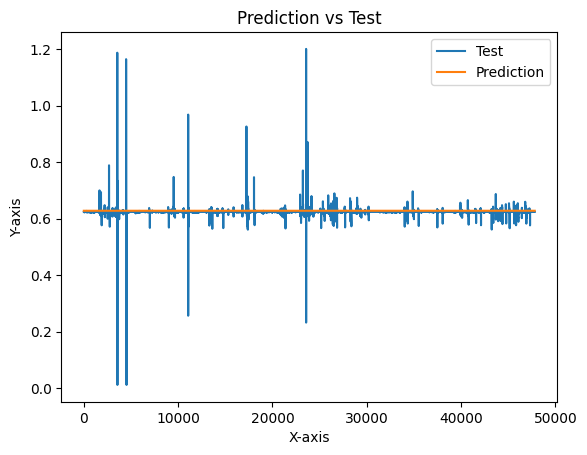

In [43]:
def predict(X_test_scaled, model):
    # Make Predictions
    return scale_y(best_model.predict(X_test_scaled).reshape(-1, 1))

def evaluate(y_test, predictions):

    # # Use np.clip to limit values between 0 and 100
    # predictions_clipped = np.clip(predictions, 0, 100)

    # Evaluate the Model
    mse = mean_squared_error(y_test, predictions)
    print(f'Mean Squared Error: {mse.item()}')

    r2 = r2_score(y_test, predictions)
    print(f'r2: {r2.item()}')

    # Plotting
    plt.plot(y_test, label='Test')
    plt.plot(predictions, label='Prediction')

    # Adding labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Prediction vs Test')

    # Adding legend
    plt.legend()

    # Display the plot
    plt.show()

def predict_and_evaluate(X_test_scaled, y_test, model):
    predictions = predict(X_test_scaled, model)
    evaluate(y_test, predictions)

predict_and_evaluate(X_test_scaled, y_test_scaled, best_model)

                  Name     Score
0   precipitation_0-60 -0.009367
1        precipitation -0.003708
2                 hour -0.001571
3            dayofweek -0.001571
4                month -0.001571
5  precipitation_0-240  0.000360
6   precipitation_0-30  0.002731
7  precipitation_0-180  0.009796
8  precipitation_0-120  0.021845
9   precipitation_0-90  0.041957


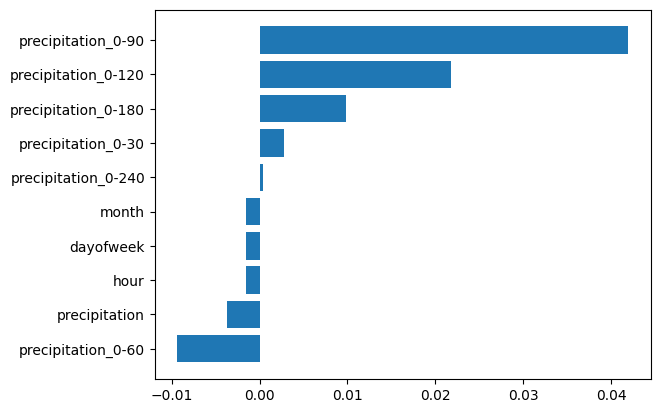

In [44]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    # Convert coef to a numpy array
    imp = np.array(coef).ravel()  # Ensure 1D array
    
    # Sort imp and names
    sorted_indices = np.argsort(imp)
    imp = imp[sorted_indices]
    names = [names[i] for i in sorted_indices]

    df = pd.DataFrame({'Name': names, 'Score': imp})
    print(df.head(20))
    # Create a horizontal bar plot
    plt.barh(range(len(names)), imp, align='center')
    
    # Set y-axis labels
    plt.yticks(range(len(names)), names)
    
    # Display the plot
    plt.show()

f_importances(best_model.coef_, X.columns.array.tolist())


In [45]:
from datetime import timedelta
def predict_one_step(X_test:pd.DataFrame, X_weather:pd.DataFrame):
    X_test_filtered = X_test.drop(columns=['percentage_delta', 'percentage', 'timestamp'])
    X_test_scaled = scale_X(X_test_filtered.tail(1))
    input = X_test.tail(1)

    percentage_delta = scale_y(predict(X_test_scaled, best_model)[0].reshape(-1, 1))

    # print('here', percentage_delta_clipped)

    future_timestamp = input['timestamp'].values[0] + + np.timedelta64(5, 'm')
    precipitation_row = X_weather[future_timestamp == X_weather['timestamp']].iloc[0]

    new_row = {
        'timestamp':future_timestamp,
        'precipitation': precipitation_row['precipitation'],
        'percentage_delta': percentage_delta,
        'percentage': input['percentage'].values[0] + percentage_delta
        }
    df_unprocessed = pd.concat([X_test[['timestamp', 'percentage', 'percentage_delta', 'precipitation' ]], pd.DataFrame([new_row])], ignore_index=True)
    
    return df_features_of_df(df_unprocessed)
    
X_original = df_features_of_df(df_reduced)
first_nan_index = X_original['precipitation_0-240'].notna().idxmax()
X_result = X_original.copy()
X_result = X_result[X_result.index <= first_nan_index]
for i in range(0,int(len(X_original)/50)):
    X_result = predict_one_step(X_result,X_original)


X_result[['percentage_delta', 'precipitation']].plot()
X_result

                 timestamp  precipitation  percentage  percentage_delta
313409 2022-01-01 08:00:00            0.0       0.000               0.0
313410 2022-01-01 08:05:00            0.0       0.000               0.0
313411 2022-01-01 08:10:00            0.0       0.000               0.0
313412 2022-01-01 08:15:00            0.0       0.000               0.0
313413 2022-01-01 08:20:00            0.0       0.000               0.0
...                    ...            ...         ...               ...
409004 2022-12-01 07:35:00            0.0       1.754               0.0
409005 2022-12-01 07:40:00            0.0       1.754               0.0
409006 2022-12-01 07:45:00            0.0       1.754               0.0
409007 2022-12-01 07:50:00            0.0       1.754               0.0
409008 2022-12-01 07:55:00            0.0       1.754               0.0

[95600 rows x 4 columns]


KeyError: 'precipitation_delta_90-120'